Grupo A (Tutoría) - Media: 85.87, Desv estándar: 4.02
Grupo B (Control) - Media: 75.07, Desv estándar: 3.71


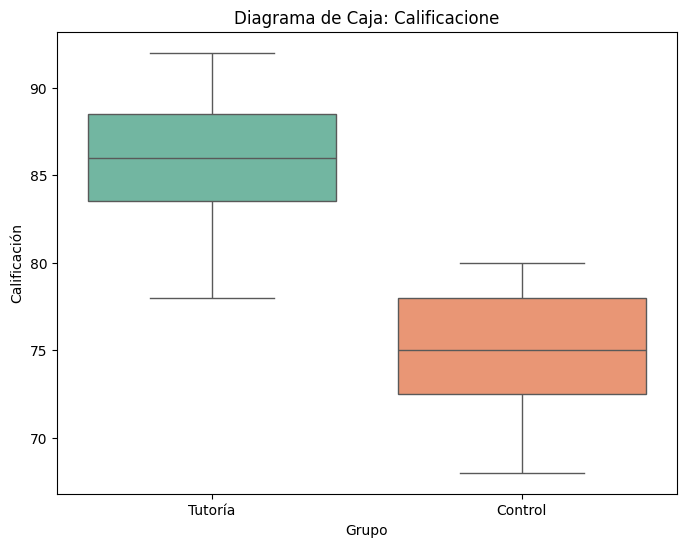

In [ ]:
'''
Imagina que trabajas en una institución educativa interesada en evaluar si un nuevo programa de tutoría mejora el rendimiento académico de los estudiantes. Para ello, se selecciona una muestra de 30 estudiantes, divididos en dos grupos:
• Grupo A (15 estudiantes): Recibe el programa de tutoría.
• Grupo B (15 estudiantes): No recibe el programa (grupo de control).
Los resultados del rendimiento académico se miden mediante un examen estándar, donde las calificaciones oscilan entre 0 y 100 puntos. Los datos obtenidos son los siguientes:
Grupo A (Tutoría): 85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88
Grupo B (Control): 70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80

INSTRUCCIONES
1.Diseño del Experimento 
• Explica brevemente cómo se podría mejorar el diseño del experimento para reducir posibles sesgos.
Para reducir posibles sesgos sería importante aleatorizar a los estudiantes de ambos grupos y emparejar estudiantes de acuerdo a 
rendimiento académico previo, además asegurar que todos los estudiantes mantengan contextos similares para dedicar al estudio, 
como un entorno adecuado y horas de estudio. AUmentar el tamaño de la muestra siempre es mejor ya que grupos de 15 estudiantes 
es una muestra pequeña.
'''

# 2. Cálculo de Estadísticas Descriptivas 


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grupo_A = np.array([85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88])
grupo_B = np.array([70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80])


# • Calcula la media y la desviación estándar para ambos grupos.

media_A = np.mean(grupo_A)
std_A = np.std(grupo_A, ddof=1)

media_B = np.mean(grupo_B)
std_B = np.std(grupo_B, ddof=1)

print(f'Grupo A (Tutoría) - Media: {media_A:.2f}, Desv estándar: {std_A:.2f}')
print(f'Grupo B (Control) - Media: {media_B:.2f}, Desv estándar: {std_B:.2f}')

# • Representa los datos gráficamente (usando histogramas o diagramas de caja).


plt.figure(figsize=(8, 6))
sns.boxplot(data=[grupo_A, grupo_B], palette='Set2')
plt.title('Diagrama de Caja: Calificaciones')
plt.xticks([0, 1], ["Tutoría", "Control"])
plt.xlabel('Grupo')
plt.ylabel('Calificación')
plt.show()




In [ ]:
# 3. Prueba de Hipótesis 
# • Plantea la hipótesis nula (H0) y alternativa (H1).
# H0: No hay diferencia en el rendimiento académico entre los dos grupos.
# H1: El grupo con tutoría tiene un mejor rendimiento académico.
# • Realiza una prueba t para comparar las medias de ambos grupos. Usa un nivel de significancia (α=0.05).

# Planteamiento de Hipótesis
print('H0: No hay diferencia en el rendimiento académico entre los dos grupos.')
# H0: media_A = media_B (no hay diferencia entre grupos)

print('H1: El grupo con tutoría tiene un mejor rendimiento académico.')
#H1: media_A > media_B #(el grupo A tiene mayor promedio)


# Definir variables

print('\nVariable dependiente: Calificación promedio')
print('Variable independiente: Grupo control o tutoría\n')

α=0.05

# Prueba estadística: t-test para diferencia de medias
from scipy.stats import ttest_ind

stat, p = ttest_ind(grupo_A, grupo_B, equal_var=False)
print(f"t-statistic: {stat:.4f}, p-value: {p:.5f}\n")

#t-statistic: 7.6489, p-value: 0.00000

# • Interpreta el valor-p y decide si rechazas o no la hipótesis nula.

if p < 0.05:
    print("Resultado: Se rechaza la hipótesis nula. La tutoría efectivamente mejora el rendimiento académico.")
else:
    print("Resultado: No se rechaza la hipótesis nula. No hay evidencia suficiente de que la tutoría mejore el rendimiento académico.")

# Al obtener un valor p < 0.05, rechazamos H0 y se puede concluir que la tutoría efectivamente mejora el rendimiento académico.



H0: No hay diferencia en el rendimiento académico entre los dos grupos.
H1: El grupo con tutoría tiene un mejor rendimiento académico.

Variable dependiente: Calificación promedio
Variable independiente: Grupo control o tutoría

t-statistic: 7.6489, p-value: 0.00000

Resultado: Se rechaza la hipótesis nula. La tutoría efectivamente mejora el rendimiento académico.


In [ ]:
# 4. Intervalo de Confianza 
# • Calcula un intervalo de confianza del 95% para la diferencia de medias entre los dos grupos.

import scipy.stats as stats

# Diferencia de medias
dif_means = media_A - media_B

# Error estándar conjunto
n1, n2 = len(grupo_A), len(grupo_B)
se_dif = np.sqrt((std_A**2 / n1) + (std_B**2 / n2))

# Grados de libertad aproximados (método de Welch-Satterthwaite)
df = ( (std_A**2/n1 + std_B**2/n2)**2 ) / ( ((std_A**2/n1)**2)/(n1-1) + ((std_B**2/n2)**2)/(n2-1) )

# Intervalo de confianza del 95%
t_crit = stats.t.ppf(0.975, df)
ci_lower = dif_means - t_crit * se_dif
ci_upper = dif_means + t_crit * se_dif

print(f"Diferencia de medias: {dif_means:.2f}")
print(f"IC 95% para la diferencia: ({ci_lower:.2f}, {ci_upper:.2f})")


# • Interpreta el resultado.

if ci_lower > 0:
    print("Interpretación: Como el intervalo de confianza está completamente por encima de 0, hay evidencia de que el programa de tutoría mejora significativamente el rendimiento académico.")
elif ci_upper < 0:
    print("Interpretación: Como el intervalo de confianza está completamente por debajo de 0, hay evidencia de que el grupo de control tuvo mejor rendimiento, lo cual es inesperado.")
else:
    print("Interpretación: Como el intervalo de confianza incluye el 0, no se puede afirmar con un 95% de confianza que el programa de tutoría tenga un efecto significativo en el rendimiento académico.")

# Si el intervalo no incluye 0 y es completamente positivo, la tutoría tiene un efecto positivo en el rendimiento.
# Si incluye 0, no se puede concluir con certeza que exista diferencia significativa.

Diferencia de medias: 10.80
IC 95% para la diferencia: (7.91, 13.69)
Interpretación: Como el intervalo de confianza está completamente por encima de 0, hay evidencia de que el programa de tutoría mejora significativamente el rendimiento académico.
